<a href="https://colab.research.google.com/github/gonza77/PortFolio/blob/main/Fruit_Consumption_Regression_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving ifood_df.csv to ifood_df.csv


In [ ]:
df = pd.read_csv("ifood_df.csv", encoding='utf-8')

In [68]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [77]:
pd.set_option('display.max_columns', 100)
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [69]:
pd.set_option('display.max_columns', 100)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [71]:
age = df["Age"]

In [72]:
mean = np.mean(age)
std = np.std(age)

In [73]:
# Definir desviaciones estandar 
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))

In [74]:
# Calcular 1 desviación
x1_lower = mean - std
x1_upper = mean + std
# Calculo 2 desviaciones
x2_lower = mean - 2*std
x2_upper = mean + 2*std


In [75]:
# Calcular las lineas de 1 y 2 desviaciones
y1_lower = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x1_lower - mean)**2 / (2 * std**2))
y1_upper = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x1_upper - mean)**2 / (2 * std**2))


y2_lower = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x2_lower - mean)**2 / (2 * std**2))
y2_upper = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x2_upper - mean)**2 / (2 * std**2))

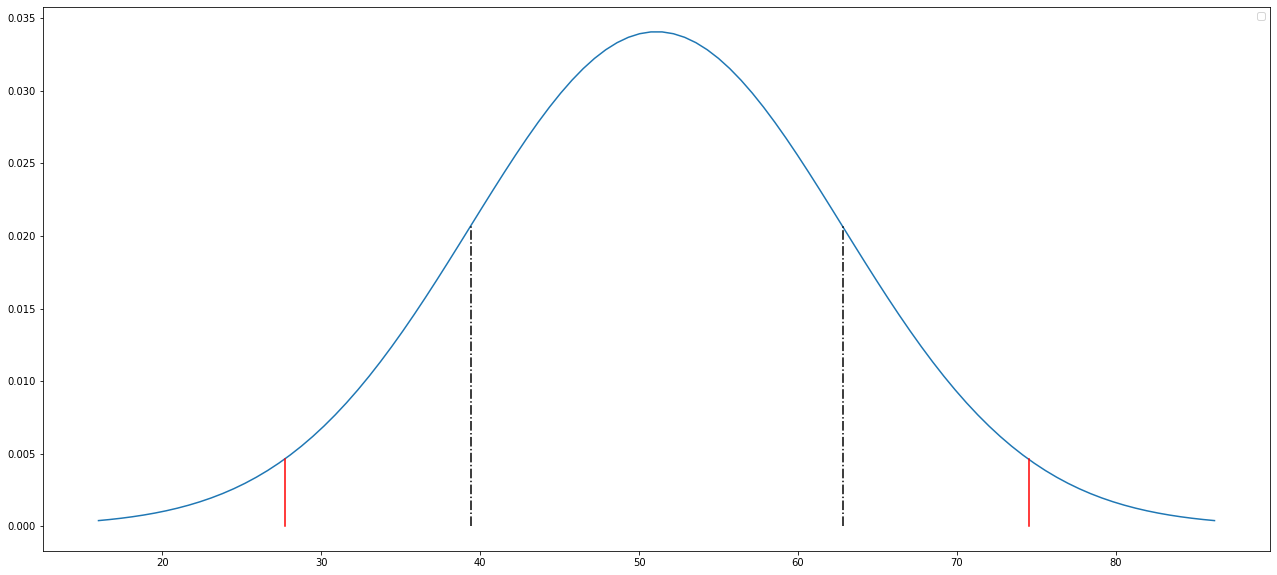

In [87]:
# Plot campana de Gauss respecto a edad clientes , media 51 (+-12 con 1 DS)
plt.figure(figsize=(22, 10))
plt.plot(x, y)

# Plot 1 standard deviation lines
plt.plot([x1_lower, x1_lower], [0, y1_lower], '-.', color='black', label='1 std')
plt.plot([x1_upper, x1_upper], [0, y1_upper], '-.', color='black')

# Plot  2 standard deviation lines
plt.plot([x2_lower, x2_lower], [0, y2_lower], '-', color='red', label='2 std')
plt.plot([x2_upper, x2_upper], [0, y2_upper], '-', color='red')

# Add a legend
plt.legend("")

plt.show()

In [90]:
## linear regression Ingresos y Frutas
from sklearn.linear_model import LinearRegression


# Extract the "MntFruits" and "Income" columns
X = df[['Income']]
y = df['MntFruits']

# Crear Modelo de regresión
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients
print(model.coef_)
print(model.intercept_)

[0.00103321]
-26.933128442292148


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


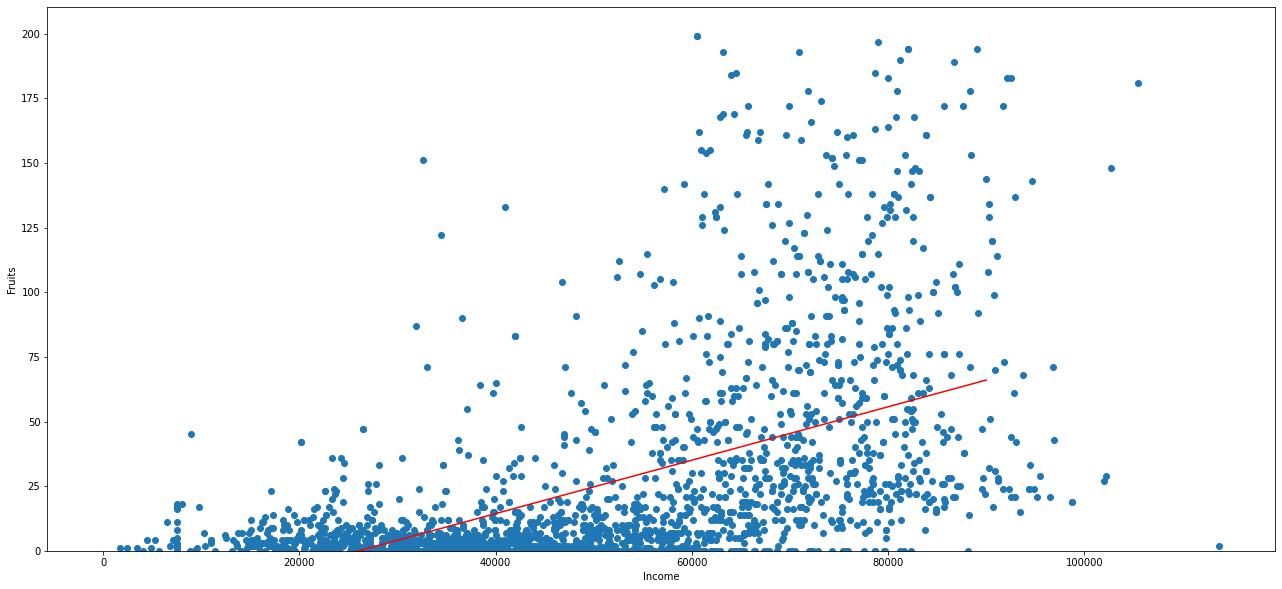

In [92]:

X = df[['Income']] # Select the "Income" column as the predictor
y = df['MntFruits'] # Select the "Fruits" column as the response

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions for a range of income values
X_pred = [[x] for x in range(0, 100000, 10000)] # Make predictions for income values from 0 to 100000, in increments of 10000
y_pred = model.predict(X_pred)

# Plot the data and the line of best fit
plt.figure(figsize=(22, 10))
plt.scatter(X, y) # Plot the data points
plt.plot(X_pred, y_pred, color='red') # Plot the line of best fit
plt.xlabel('Income') # Set the x-axis label
plt.ylabel('Fruits')
plt.ylim(0)  # Set the y-axis label
plt.show() # Show the plot

Por modelo de regresión tenemos que a mayores ingresos hay un mayor consumo de frutas

In [99]:
df2 = ["Income","Age", "MntFruits"]

df2 = df[df2]

In [100]:
df2

,Income,Age,MntFruits
0,58138.0,63,88
1,46344.0,66,1
2,71613.0,55,49
3,26646.0,36,4
4,58293.0,39,43
...,...,...,...
2200,61223.0,53,43
2201,64014.0,74,0
2202,56981.0,39,48
2203,69245.0,64,30


In [101]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

# Evaluate the results
print(kmeans.inertia_)

2913.1538285823367


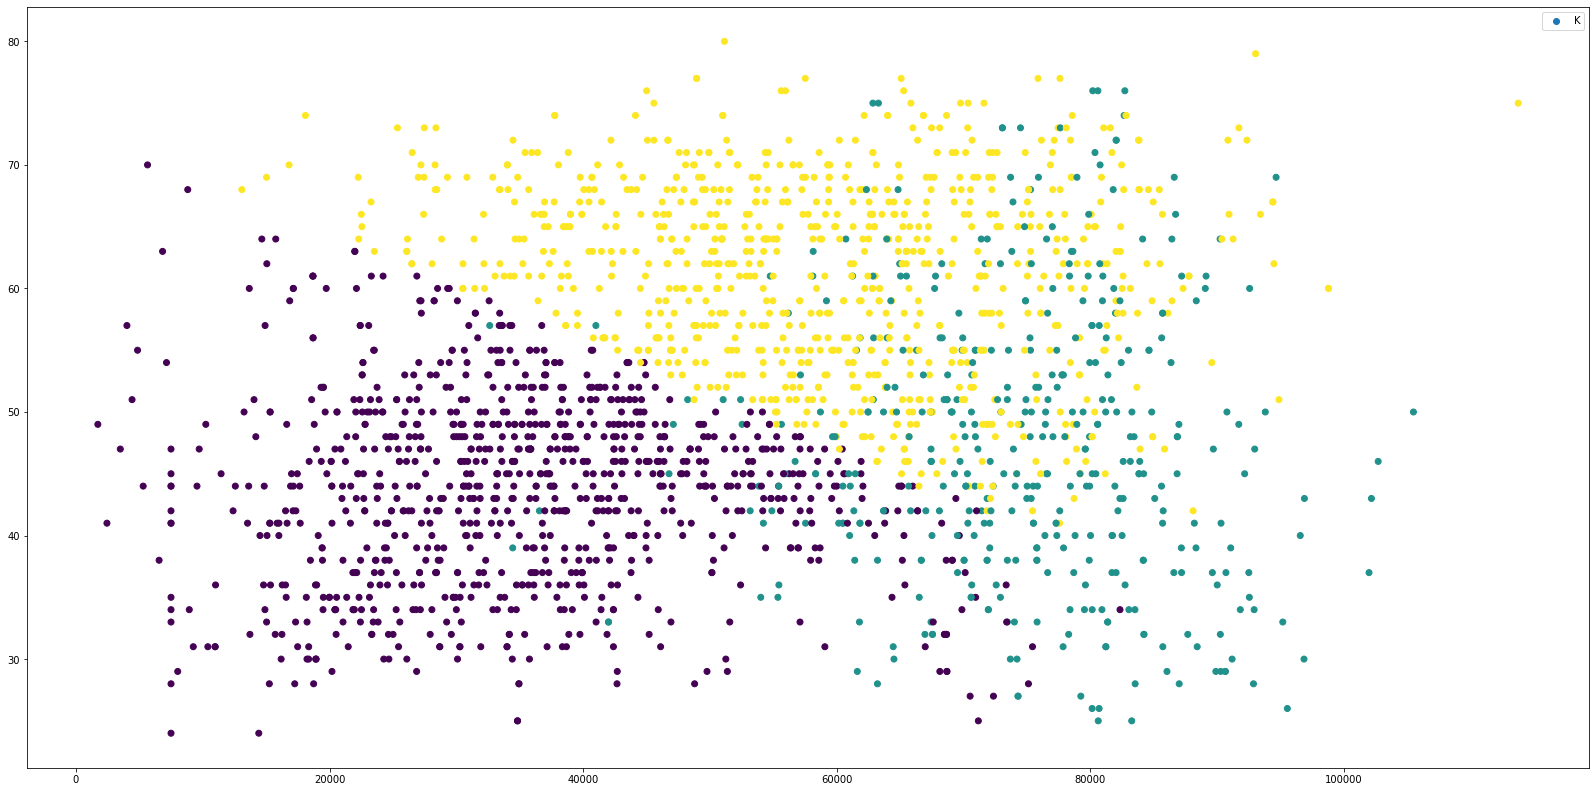

In [114]:
from matplotlib.patches import Circle

# Get the cluster labels
labels = kmeans.labels_
plt.figure(figsize=(28, 14))

# Create a scatter plot
plt.scatter(df2["Income], df2["Age"], c=labels)



# Add a legend
plt.legend("Kmeans")

# Show the plot
plt.show()

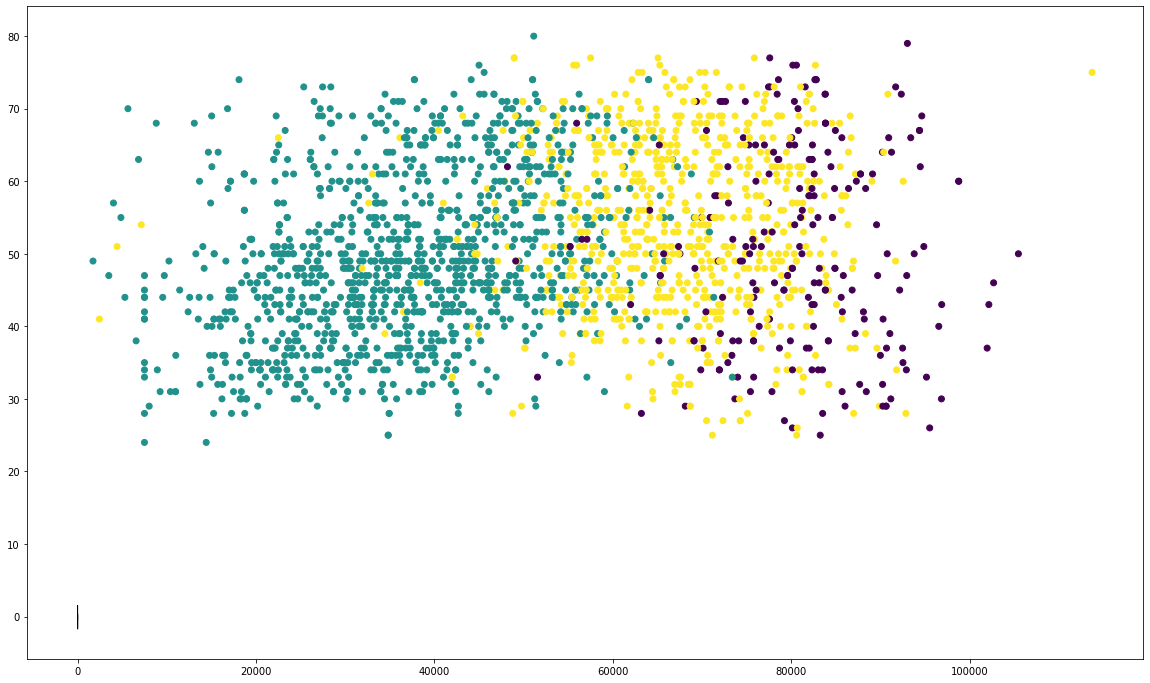

In [130]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#  k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

# Get the cluster labels


# Get the cluster centers
centers = kmeans.cluster_centers_

# Create a scatter plot

fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(df["Income"], df["Age"], c=labels)# Add circles around the clusters
for center in centers:
    ax.add_patch(Circle(center, radius=1, color='k'))




# Show the plot
plt.show()